<a href="https://colab.research.google.com/github/nowshine-sharmili-piuli/Machine-Leaning-Lab/blob/main/ML_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preprocessing**

**Step-1: Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

**Step-2:Load the dataset**

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Step-3:Handle missing data**

In [ ]:
#Fill the missing age value with median
df['Age']=df['Age'].fillna(df['Age'].median())

In [ ]:
#fill the missing Embarked Values with mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
#Drop the Cabin column as it has many missing values
df=df.drop('Cabin',axis=1)

In [ ]:
#Check for any remaining missing data
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Step-4:Encoding Categorical data**

In [ ]:
#label encoding for Sex column
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [ ]:
#one hot encoding for Embarked Column
if 'Embarked' in df.columns:
  df = pd.get_dummies(df, columns=['Embarked'], prefix=['Embarked'])
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,False,True


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,False,True


**Step-6: Split the data into features and target variables**

In [ ]:
#define the target variable and feature variables
x = df.drop(['Survived', 'Name', 'Ticket'], axis=1) # Drop 'Survived', 'Name', and 'Ticket' columns
y = df['Survived'] # Target variable Survived Column

#Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Check the Dimensionsof the splits
print(x_train.shape, x_test.shape)

(712, 10) (179, 10)


**Step-7: Data Scaling**

In [ ]:
#initialize the Scaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#check the scaled feature
display(x_train[:5])

array([[-0.45306593, -1.61413602,  0.7243102 ,  1.25364106, -0.47072241,
        -0.47934164, -0.07868358, -0.46146201, -0.30335547,  0.59248936],
       [ 1.11387354, -0.40055118,  0.7243102 , -0.47728355, -0.47072241,
        -0.47934164, -0.37714494, -0.46146201, -0.30335547,  0.59248936],
       [-0.25427511,  0.81303367,  0.7243102 ,  0.21508629, -0.47072241,
        -0.47934164, -0.47486697, -0.46146201, -0.30335547,  0.59248936],
       [ 1.00083562,  0.81303367,  0.7243102 , -0.24649361,  0.37992316,
        -0.47934164, -0.47623026, -0.46146201, -0.30335547,  0.59248936],
       [ 1.42570229,  0.81303367, -1.38062393, -1.78509326,  2.93185988,
         2.04874166, -0.02524937, -0.46146201, -0.30335547,  0.59248936]])

**Step-8:Visualization Data**

<Axes: >

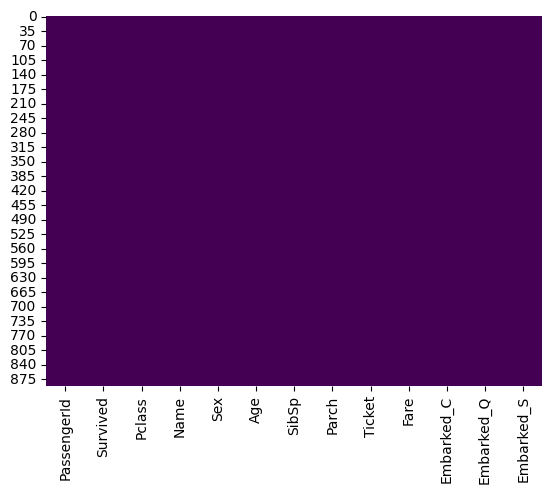

In [ ]:
#Plot missing data heatmap
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<Axes: >

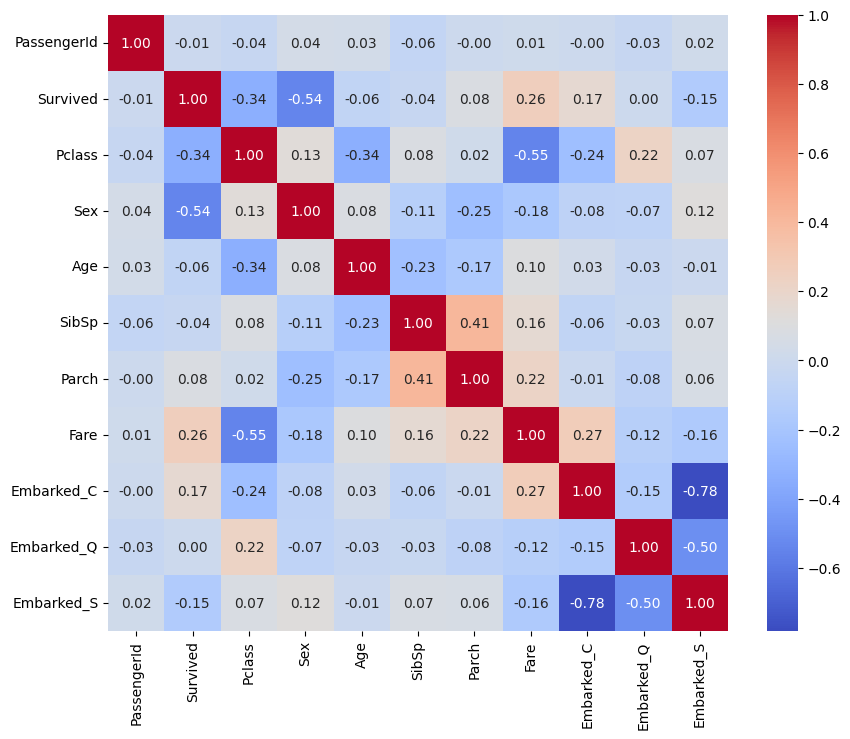

In [ ]:
#Plot the correlation matrix to see relationships between features
corr_matrix = df.drop(['Name', 'Ticket'], axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt='.2f')

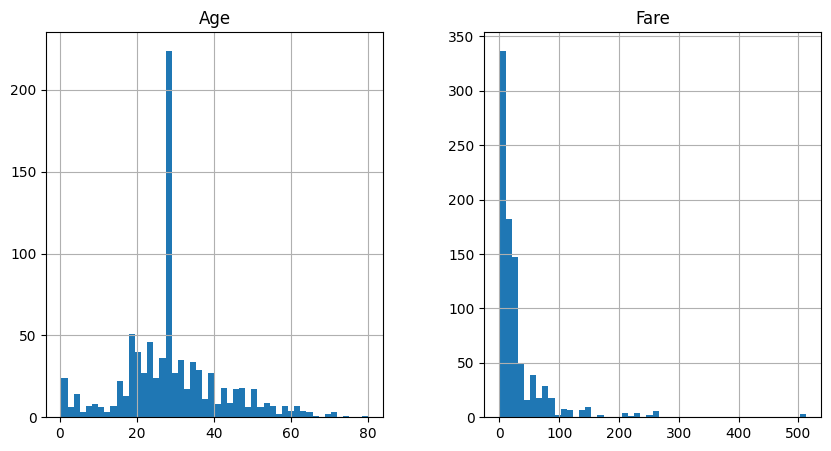

In [ ]:
#Plot distribution of numerical features
df[['Age','Fare']].hist(figsize=(10,5),bins=50)
plt.show()

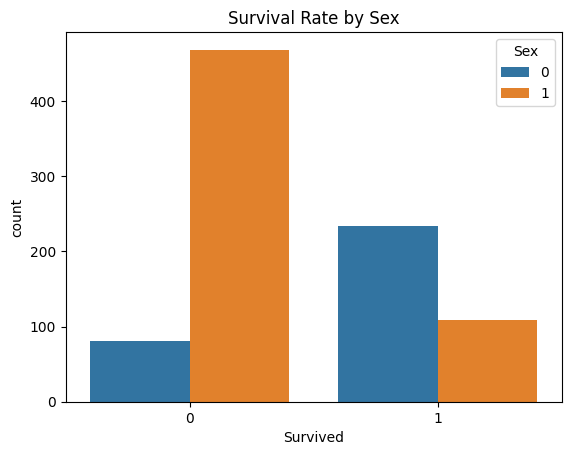

In [ ]:
#plot survival rates based on sex
#sns.barplot(x='Sex',y='Survived',data=df)
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Survival Rate by Sex')
plt.show()